In [14]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import utility

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)
colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
colors_opa = ['#F9414466', '#90BE6D66', '#57759066','#F3722C66', '#F8961E66',
              '#F9844A66', '#F9C74F66', '#43AA8B66', '#4D908E66', '#277DA166']

sns.set_palette(sns.color_palette(colors))

from sktime.utils.data_io import load_from_tsfile_to_dataframe

figure_path = module_path + '/figures/'

target_rate = 41000

In [78]:
crackle_sample = '/home/andrine/Desktop/TromsoDataset/Hasse413/16202617_lungelyd_2.wav'
wheeze_sample = '/home/andrine/Desktop/TromsoDataset/Hasse413/25784430_lungelyd_2.wav'
normal_sample = '/home/andrine/Desktop/TromsoDataset/Hasse413/15313417_lungelyd_2.wav'


insp_crackle = '/home/andrine/Desktop/TromsoDataset/Hasse413/15339627_lungelyd_5.wav'
exp_crackle = '/home/andrine/Desktop/TromsoDataset/Hasse413/26226018_lungelyd_5.wav'
insp_wheeze = '/home/andrine/Desktop/TromsoDataset/Hasse413/20892526_lungelyd_5.wav'
exp_wheeze = '/home/andrine/Desktop/TromsoDataset/Hasse413/10756322_lungelyd_5.wav'
normal = '/home/andrine/Desktop/TromsoDataset/Hasse413/25882126_lungelyd_5.wav'

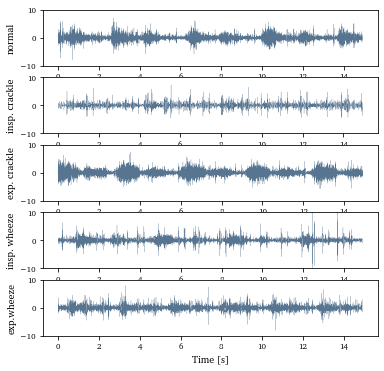

In [84]:
labels = {
    'normal' : normal, 
    'insp. crackle': insp_crackle,
    'exp. crackle' : exp_crackle,
    'insp. wheeze': insp_wheeze,
    'exp.wheeze': exp_wheeze
}

def znorm(timeseries):
    mean = np.mean(timeseries)
    sd = np.std(timeseries)
    return (timeseries - mean)/sd

f, axs = plt.subplots(5,1)
f.set_size_inches(6, 6)

for (name,label), ax in zip(labels.items(), axs):
    sr, audio = utility.read_wav_file(label, target_rate)
    audio = utility.denoise_audio(audio)
    audio, sr = utility.downsample(audio, sr, 4000), 4000
    audio = znorm(audio)
    duration = float(len(audio)) / sr
    T = 1.0/sr
    N = int(duration / T)
    x = np.linspace(0.0, N*T, N +1 )
    if len(x) != len(audio):
        x = np.linspace(0.0, N*T, N)
    
    
    ax.plot(x, audio, linewidth = 0.2, c = colors[2])
    ax.set_ylim(-10, 10)
    for label in ax.get_yticklabels() :
        label.set_fontproperties(font_small)
    for label in ax.get_xticklabels() :
        label.set_fontproperties(font_small)
    ax.set_ylabel(f'{name}', fontproperties = font)
    ax.set_xlabel('Time [s]', fontproperties = font)

f.savefig(figure_path + f'lung_sound_uit_ex.pdf', bbox_inches='tight')

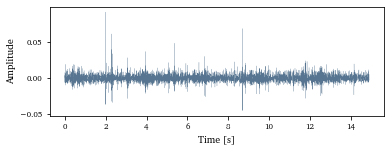

In [68]:
sr, audio = utility.read_wav_file('/home/andrine/Desktop/TromsoDataset/Hasse413/16084625_lungelyd_4.wav', target_rate)
audio = utility.denoise_audio(audio)
audio, sr = utility.downsample(audio, sr, 4000), 4000

duration = float(len(audio)) / sr
T = 1.0/sr
N = int(duration / T)
x = np.linspace(0.0, N*T, N +1 )
if len(x) != len(audio):
    x = np.linspace(0.0, N*T, N)

f, ax = plt.subplots(1,1)
f.set_size_inches(6, 2)
ax.plot(x, audio, linewidth = 0.2, c = colors[2])

for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('Amplitude', fontproperties = font)
ax.set_xlabel('Time [s]', fontproperties = font)

f.savefig(figure_path + f'lung_sound_uit_ex.pdf', bbox_inches='tight')

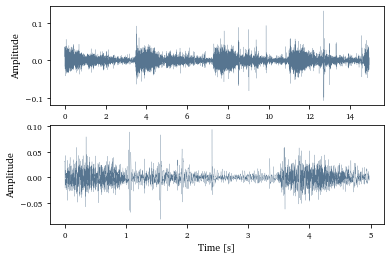

In [23]:
def get_sub_audios(audio):
    base = len(audio)//3 
    half_base = base //2
    lengths = [(0, base)]

    while lengths[-1][1] < len(audio):
        lengths.append((lengths[-1][0] + base - half_base, lengths[-1][1] + base - half_base))

    sub_audio = []
    prev_len = len(audio[lengths[0][0]:lengths[0][1]])

    for l in lengths:
        sub = audio[l[0]:l[1]]
        if prev_len != len(sub):
            diff = prev_len - len(sub)
            sub = audio[l[0]- diff:l[1]]
            #print(diff)
        prev_len = len(sub)
        #print(len(sub))
        sub_audio.append(sub)
    return sub_audio

sub_audio = get_sub_audios(audio)
audio_s = sub_audio[3]

duration_s = float(len(audio_s)) / sr
T = 1.0/sr
N_s = int(duration_s / T)
x_s = np.linspace(0.0, N_s*T, N_s +1 )
if len(x_s) != len(audio_s):
    x_s = np.linspace(0.0, N_s*T, N_s)

f, axs = plt.subplots(2,1)
f.set_size_inches(6, 4)

plots = [(x , audio) ,(x_s , audio_s)]

for ax, plot_data in zip(axs, plots):
    ax.plot(plot_data[0], plot_data[1], linewidth = 0.2, c = colors[2])

    for label in ax.get_yticklabels() :
        label.set_fontproperties(font_small)
    for label in ax.get_xticklabels() :
        label.set_fontproperties(font_small)
    ax.set_ylabel('Amplitude', fontproperties = font)
    ax.set_xlabel('Time [s]', fontproperties = font)

f.savefig(figure_path + f'lung_sound_uit_ex_window.pdf', bbox_inches='tight')

In [32]:
len(x)

59735

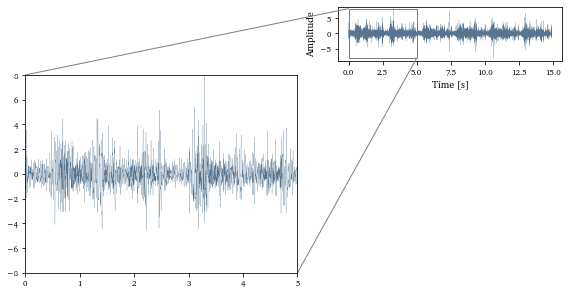

In [92]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


fig, ax = plt.subplots(1,1)
fig.set_size_inches(4, 1)
#fig = plt.figure(figsize=(6,3))
#ax = plt.axes()
ax.plot(x, audio, linewidth = 0.2, c = colors[2])

for label in ax.get_yticklabels() :
        label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
ax.set_ylabel('Amplitude', fontproperties = font)
ax.set_xlabel('Time [s]', fontproperties = font)

x1 = 10000
x2 = 15000

# select y-range for zoomed region
y1 = 0.1
y2 = 0.1

# Make the zoom-in plot:
#axins = zoomed_inset_axes(ax, 2, loc=1) # zoom = 2
#axins.plot(x , audio)
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)

axins = zoomed_inset_axes(ax, 4, loc = 1,  bbox_to_anchor=(0,0))
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([0,5])
axins.set_ylim([-8,8])
axins.plot(x, audio, linewidth = 0.2, c = colors[2])

for label in axins.get_yticklabels() :
        label.set_fontproperties(font_small)
for label in axins.get_xticklabels() :
    label.set_fontproperties(font_small)


#plt.xticks(visible=False)
#plt.yticks(visible=False)
#mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
#plt.draw()
plt.show()

fig.savefig(figure_path + f'lung_sound_uit_ex_window.pdf', bbox_inches='tight')

## Code to play audio

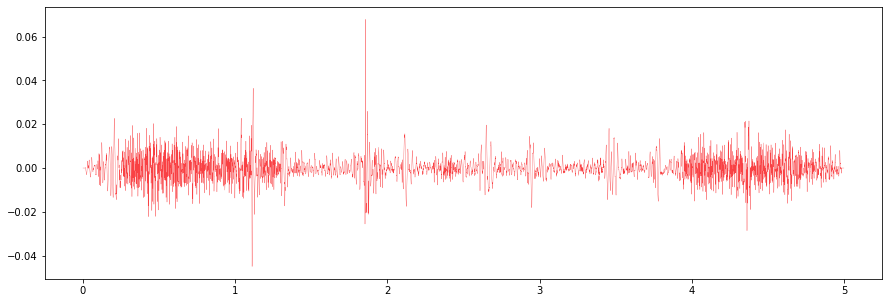

In [7]:
import IPython.display as ipd



X, y = load_from_tsfile_to_dataframe(module_path +  '/data/ts_files/UiT_compressed.ts')
audio = X.iloc[4].values[0].to_numpy()
sr = 4000

duration = float(len(audio)) / sr
T = 1.0/sr
N = int(duration / T)
x = np.linspace(0.0, N*T, N)
if len(x) != len(audio):
    x = np.linspace(0.0, N*T, N +1 ) 

f, ax = plt.subplots(1,1)
f.set_size_inches(15, 5)
ax.plot(x, audio, linewidth = 0.3)



ipd.Audio(audio, rate=sr) # load a NumPy array